Missing values in each column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
Unique diagnosis labels: ['M' 'B']


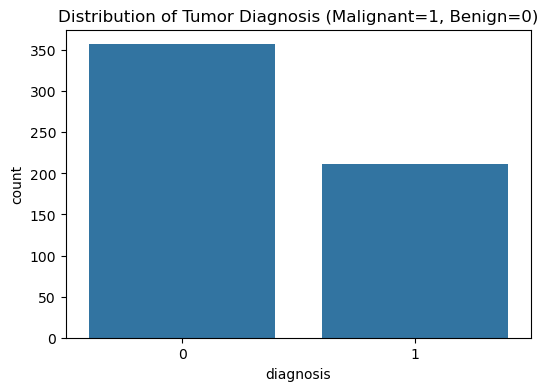

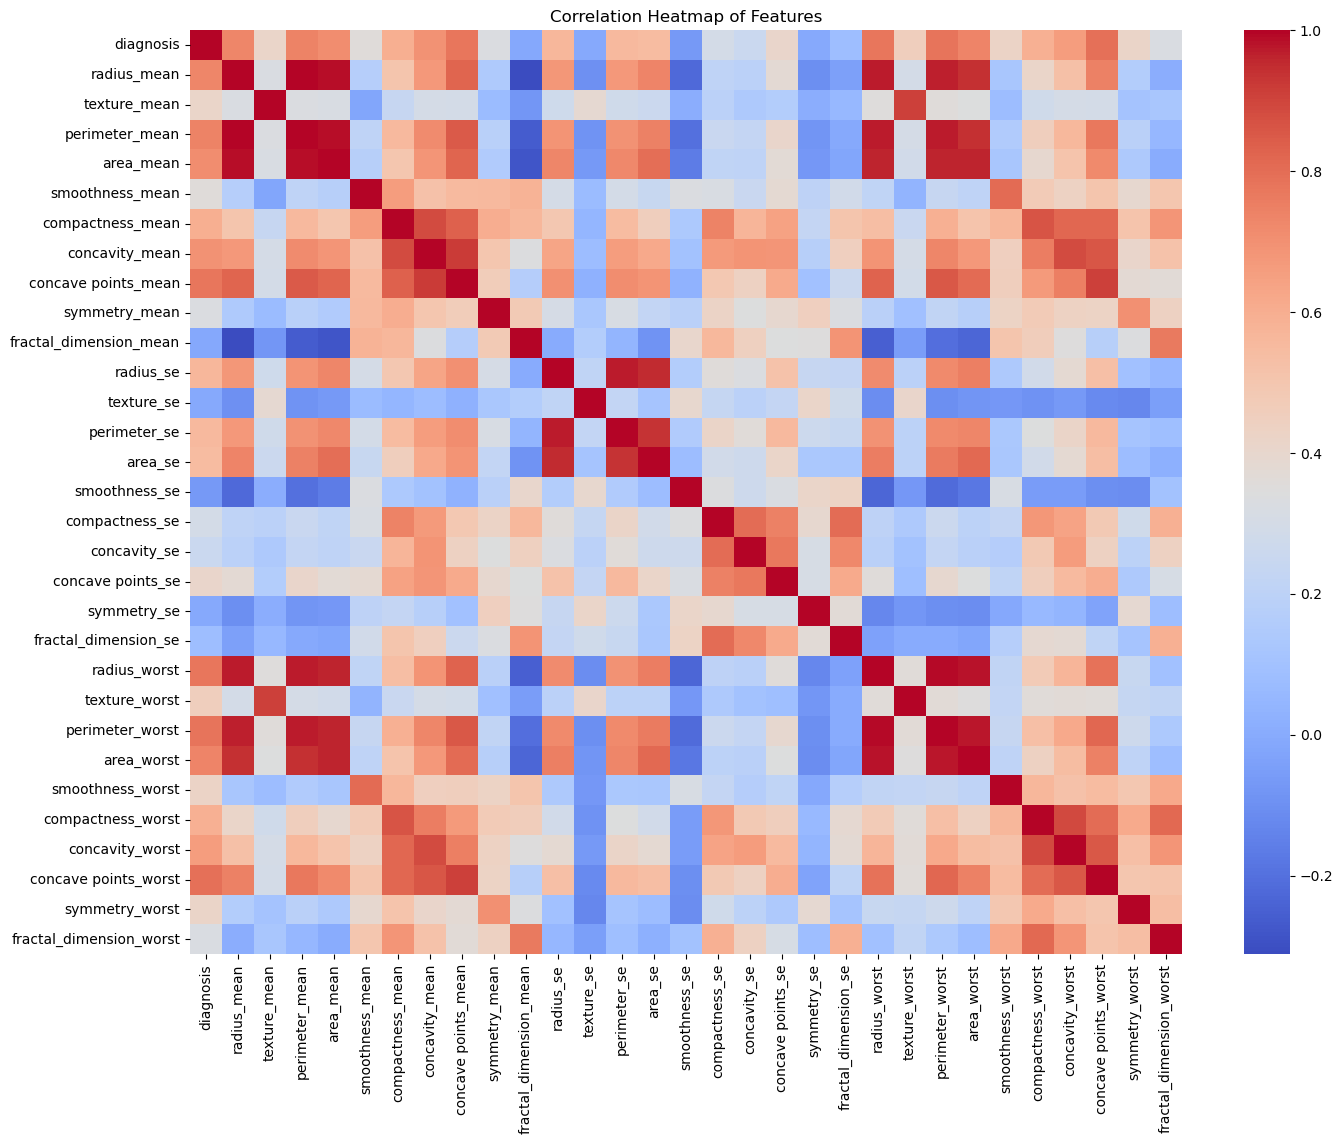

Accuracy: 0.9649
Confusion Matrix:
[[70  1]
 [ 3 40]]
Classification Report:
              precision    recall  f1-score   support

      Benign       0.96      0.99      0.97        71
   Malignant       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv('Tumor_Detection.csv')

# Drop irrelevant columns
if 'id' in data.columns:
    data = data.drop(columns=['id'])

# Check for missing values
print("Missing values in each column:")
print(data.isnull().sum())

# Map diagnosis labels to numerical values
print("Unique diagnosis labels:", data['diagnosis'].unique())
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Visualize the distribution of diagnosis labels
plt.figure(figsize=(6,4))
sns.countplot(x='diagnosis', data=data)
plt.title('Distribution of Tumor Diagnosis (Malignant=1, Benign=0)')
plt.show()

# Compute and visualize correlation matrix
corr_matrix = data.corr()
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap of Features')
plt.show()

# Prepare features and target variable
X = data.drop(columns=['diagnosis'])
y = data['diagnosis']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=['Benign', 'Malignant'])

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)
